In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

In [13]:
dataset = load_boston()

dataset.data.shape

(506, 13)

In [14]:
x_full,y_full = dataset.data,dataset.target
n_samples = x_full.shape[0]
n_features = x_full.shape[1]


In [15]:
rng = np.random.RandomState(0)
missing_rate= 0.5
n_missing_samples =  int(np.floor(n_samples * n_features * missing_rate))

In [16]:
missing_features =  rng.randint(0,n_features,n_missing_samples)
missing_samples = rng.randint(0,n_samples,n_missing_samples)

In [17]:
x_missing = x_full.copy()
y_missing = y_full.copy()
x_missing[missing_samples,missing_features] = np.nan
x_missing = pd.DataFrame(x_missing)
print(x_missing)

          0     1      2    3      4      5     6       7    8      9     10  \
0        NaN  18.0    NaN  NaN  0.538    NaN  65.2  4.0900  1.0  296.0   NaN   
1    0.02731   0.0    NaN  0.0  0.469    NaN  78.9  4.9671  2.0    NaN   NaN   
2    0.02729   NaN   7.07  0.0    NaN  7.185  61.1     NaN  2.0  242.0   NaN   
3        NaN   NaN    NaN  0.0  0.458    NaN  45.8     NaN  NaN  222.0  18.7   
4        NaN   0.0   2.18  0.0    NaN  7.147   NaN     NaN  NaN    NaN  18.7   
..       ...   ...    ...  ...    ...    ...   ...     ...  ...    ...   ...   
501      NaN   NaN    NaN  0.0  0.573    NaN  69.1     NaN  1.0    NaN  21.0   
502  0.04527   0.0  11.93  0.0  0.573  6.120  76.7  2.2875  1.0  273.0   NaN   
503      NaN   NaN  11.93  NaN  0.573  6.976  91.0     NaN  NaN    NaN  21.0   
504  0.10959   0.0  11.93  NaN  0.573    NaN  89.3     NaN  1.0    NaN  21.0   
505  0.04741   0.0  11.93  0.0  0.573  6.030   NaN     NaN  1.0    NaN   NaN   

         11    12  
0       NaN  4.98  

In [18]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
x_missing_mean = imp_mean.fit_transform(x_missing)

In [19]:
imp_0 = SimpleImputer(missing_values=np.nan, strategy="constant",fill_value=0)
x_missing_0 = imp_0.fit_transform(x_missing)

In [20]:
x_missing_reg = x_missing.copy()
sortindex = np.argsort(x_missing_reg.isnull().sum(axis=0)).values

In [21]:
from sklearn.model_selection import cross_val_score

for i in sortindex:
    df = x_missing_reg
    fillc = df.iloc[:,i]
    df = pd.concat([df.iloc[:,df.columns != i],pd.DataFrame(y_full)],axis=1)
    df_0 =SimpleImputer(missing_values=np.nan,
                        strategy='constant',fill_value=0).fit_transform(df)
    Ytrain = fillc[fillc.notnull()]
    Ytest = fillc[fillc.isnull()]
    Xtrain = df_0[Ytrain.index,:]
    Xtest = df_0[Ytest.index,:]
    rfc = RandomForestRegressor(n_estimators=100)
    rfc = rfc.fit(Xtrain, Ytrain)
    Ypredict = rfc.predict(Xtest)
    x_missing_reg.loc[x_missing_reg.iloc[:,i].isnull(),i] = Ypredict
    X = [x_full,x_missing_mean,x_missing_0,x_missing_reg]
    mse = []
    std = []
    for x in X:
        estimator = RandomForestRegressor(random_state=0, n_estimators=100)
        scores = cross_val_score(estimator,x,y_full,scoring='neg_mean_squared_error',
                                 cv=5).mean()
        mse.append(scores * -1)





D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "D:\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "D:\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "D:\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  File "D:\anaconda3\lib\site-packages\sklearn\utils\validation.py", 

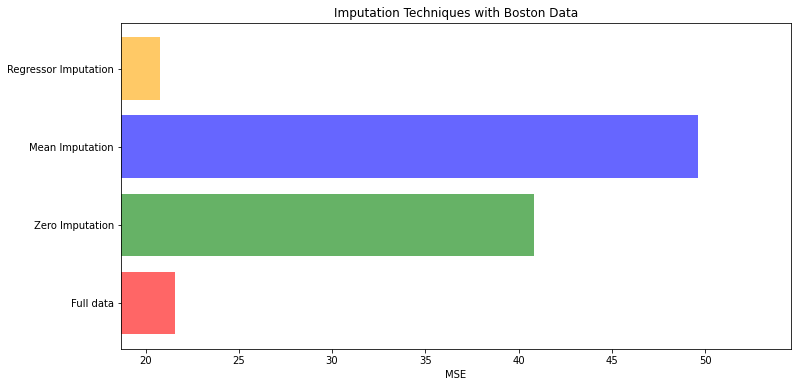

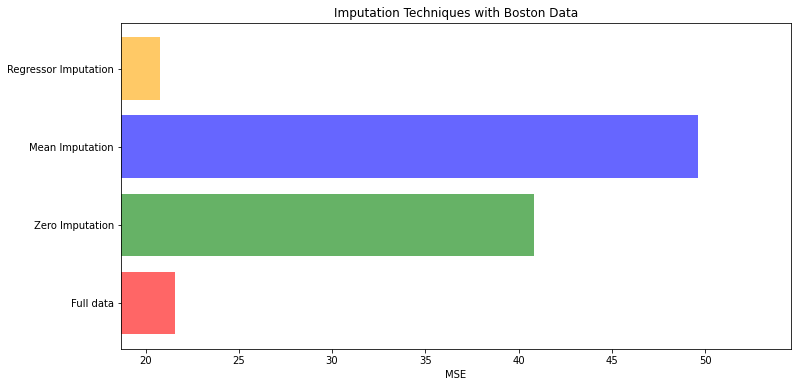

In [23]:
x_labels = ['Full data','Zero Imputation','Mean Imputation','Regressor Imputation']
colors = ['r', 'g', 'b', 'orange']
plt.figure(figsize=(12, 6))
ax = plt.subplot(111)
for i in np.arange(len(mse)):
    ax.barh(i, mse[i],color=colors[i], alpha=0.6, align='center')
ax.set_title('Imputation Techniques with Boston Data')
ax.set_xlim(left=np.min(mse) * 0.9,
            right=np.max(mse) * 1.1)
ax.set_yticks(np.arange(len(mse)))
ax.set_xlabel('MSE')
ax.set_yticklabels(x_labels)
plt.show()

In [27]:
pd.DataFrame(df_0).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64